In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
ins=pd.read_csv('SBI_LifeInsurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [3]:
ins.head(7)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1


In [4]:
ins.tail(7)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1331,23,0,33.40,0,0,3,10795.93733,1
1332,52,0,44.70,3,0,3,11411.68500,0
1333,50,1,30.97,3,0,1,10600.54830,0
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1
1336,21,0,25.80,0,0,3,2007.94500,0
1337,61,0,29.07,0,1,1,29141.36030,1


In [5]:
ins.min()

age                 18.0000
sex                  0.0000
bmi                 15.9600
children             0.0000
smoker               0.0000
region               0.0000
charges           1121.8739
insuranceclaim       0.0000
dtype: float64

In [6]:
ins.max()

age                  64.00000
sex                   1.00000
bmi                  53.13000
children              5.00000
smoker                1.00000
region                3.00000
charges           63770.42801
insuranceclaim        1.00000
dtype: float64

In [7]:
ins.mean()

age                  39.207025
sex                   0.505232
bmi                  30.663397
children              1.094918
smoker                0.204783
region                1.515695
charges           13270.422265
insuranceclaim        0.585202
dtype: float64

In [8]:
ins.isnull().sum()
#no null values

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

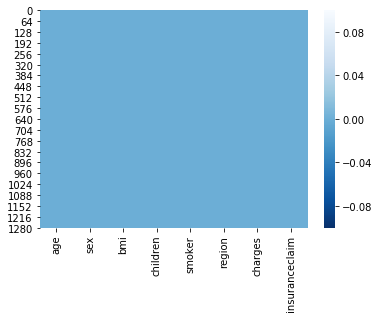

In [9]:
sns.heatmap(ins.isnull(),cmap='Blues_r')

In [10]:
ins.shape

(1338, 8)

In [11]:
ins.drop_duplicates(keep='first',inplace=True)

In [12]:
ins.shape
#1 duplicated data eliminated

(1337, 8)

In [13]:
ins.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'], dtype=object)

In [14]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
age               1337 non-null int64
sex               1337 non-null int64
bmi               1337 non-null float64
children          1337 non-null int64
smoker            1337 non-null int64
region            1337 non-null int64
charges           1337 non-null float64
insuranceclaim    1337 non-null int64
dtypes: float64(2), int64(6)
memory usage: 94.0 KB


In [15]:
ins.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487,0.584892
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656,0.492925
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300,1.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [16]:
ins.groupby(ins['sex']).mean()

,age,bmi,children,smoker,region,charges,insuranceclaim
sex,,,,,,,
0,39.503021,30.377749,1.074018,0.173716,1.510574,12569.578844,0.569486
1,38.946667,30.943652,1.117037,0.235556,1.521481,13974.998864,0.600000


In [17]:
ins.groupby(ins['smoker']).mean()

,age,sex,bmi,children,region,charges,insuranceclaim
smoker,,,,,,,
0,39.404516,0.485419,30.651853,1.091251,1.517404,8440.660307,0.501411
1,38.514599,0.580292,30.708449,1.113139,1.510949,32050.231832,0.908759


In [18]:
ins.groupby(ins['region']).mean()

,age,sex,bmi,children,smoker,charges,insuranceclaim
region,,,,,,,
0,39.268519,0.503086,29.173503,1.046296,0.206790,13406.384516,0.592593
1,39.259259,0.493827,29.195494,1.151235,0.179012,12450.840844,0.500000
2,38.939560,0.519231,33.355989,1.049451,0.250000,14735.411438,0.673077
3,39.455385,0.501538,30.596615,1.141538,0.178462,12346.937377,0.563077


Text(0.5, 1.0, 'PLOT TO SHOW THE FREQUENCY OF SEX ')

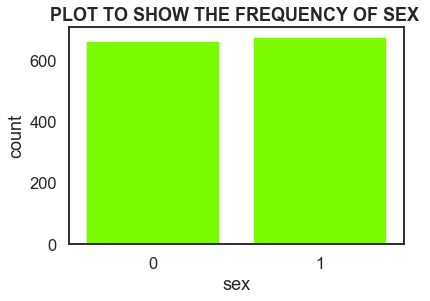

In [19]:
#countplot for sex
sns.set(style='white')
sns.set_context('talk',font_scale=1.0)
sns.countplot(x='sex',data=ins,saturation=21,color='lawngreen')
plt.title('PLOT TO SHOW THE FREQUENCY OF SEX ',weight='bold')

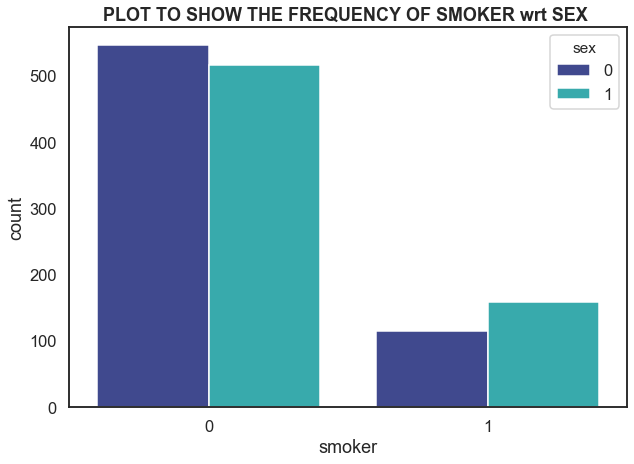

In [20]:
plt.figure(figsize=(10,7))
sns.set(style='white')
sns.set_context('talk',font_scale=1)
sns.countplot(x='smoker',data=ins,hue='sex',saturation=21,palette='mako')
plt.title('PLOT TO SHOW THE FREQUENCY OF SMOKER wrt SEX ',weight='bold')
plt.show()

Text(0.5, 1.0, 'PLOT TO SHOW THE PRESENCE OF MALE & FEMALE IN DIFFERENT REGIONS ')

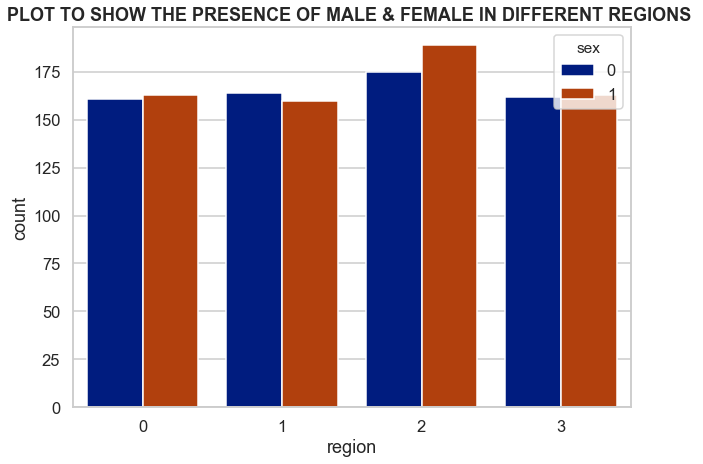

In [21]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.countplot(x='region',data=ins,hue='sex',saturation=21,palette='dark')
plt.title('PLOT TO SHOW THE PRESENCE OF MALE & FEMALE IN DIFFERENT REGIONS ',weight='bold')

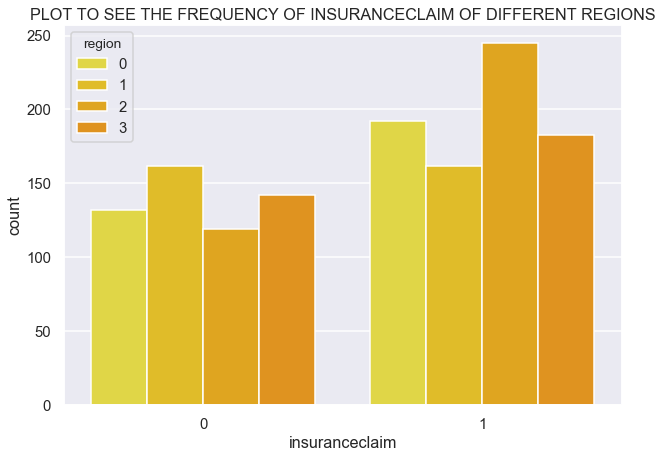

In [22]:
#region vs insuranceclaim
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.9)
sns.countplot(x='insuranceclaim',hue='region',data=ins,palette='Wistia',)
plt.title('PLOT TO SEE THE FREQUENCY OF INSURANCECLAIM OF DIFFERENT REGIONS')
plt.show()

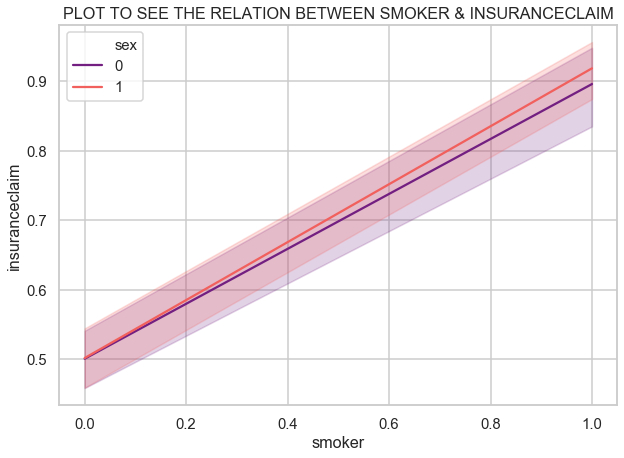

In [23]:
#smoker vs insuranceclaim-line
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.9)
sns.lineplot(x='smoker',y='insuranceclaim',data=ins,hue='sex',palette='magma',dashes=True)
plt.title('PLOT TO SEE THE RELATION BETWEEN SMOKER & INSURANCECLAIM')
plt.show()
#high smoking rate lead to high rate in claiming the insurance

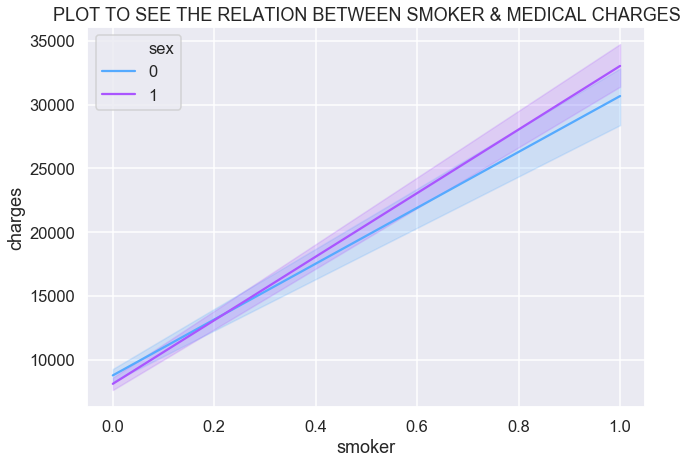

In [24]:
#smoker vs charges-lineplot
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1)
sns.lineplot(x='smoker',y='charges',data=ins,hue='sex',palette='cool',dashes=True)
plt.title('PLOT TO SEE THE RELATION BETWEEN SMOKER & MEDICAL CHARGES')
plt.show()
#high smoking rate lead to high rate in medical charge 

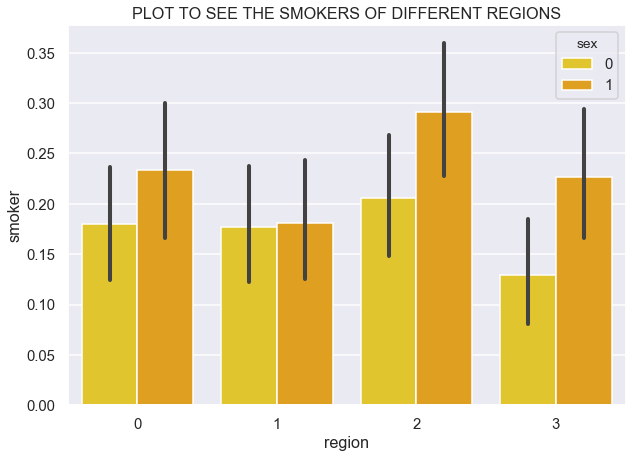

In [25]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('paper')
sns.set_context('talk',font_scale=0.9)
sns.barplot(x='region',y='smoker',hue='sex',data=ins,palette='Wistia',)
plt.title('PLOT TO SEE THE SMOKERS OF DIFFERENT REGIONS')
plt.show()

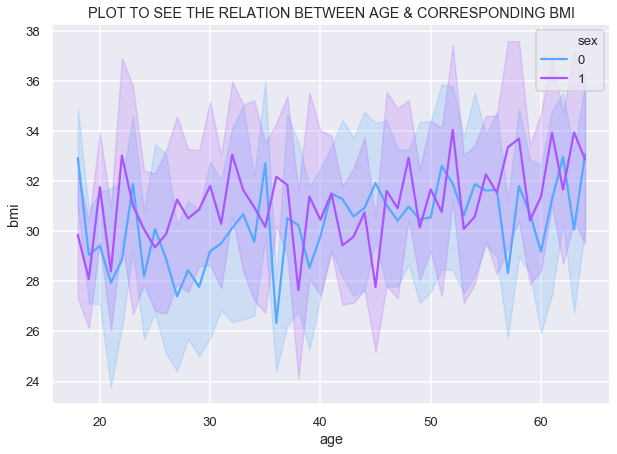

In [26]:
#age vs bmi-lineplot
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.lineplot(x='age',y='bmi',data=ins,hue='sex',palette='cool',dashes=True)
plt.title('PLOT TO SEE THE RELATION BETWEEN AGE & CORRESPONDING BMI')
plt.show()

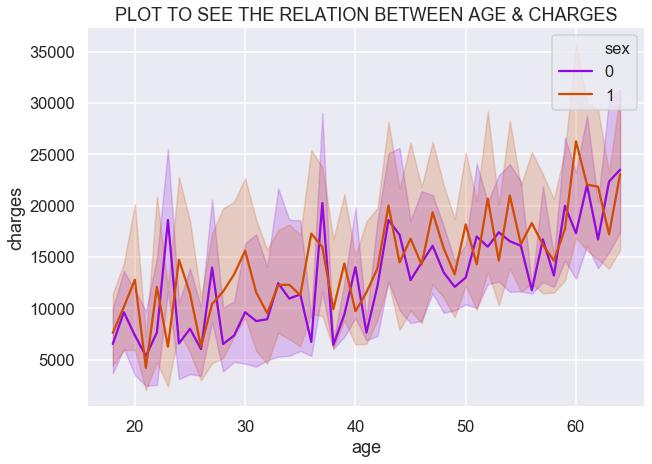

In [27]:
#age vs charge-line

plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1)
sns.lineplot(x='age',y='charges',data=ins,hue='sex',palette='gnuplot',dashes=True)
plt.title('PLOT TO SEE THE RELATION BETWEEN AGE & CHARGES')
plt.show()
#increase in age increases the medical cost

In [28]:
insval=ins.columns.values
insval

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'], dtype=object)

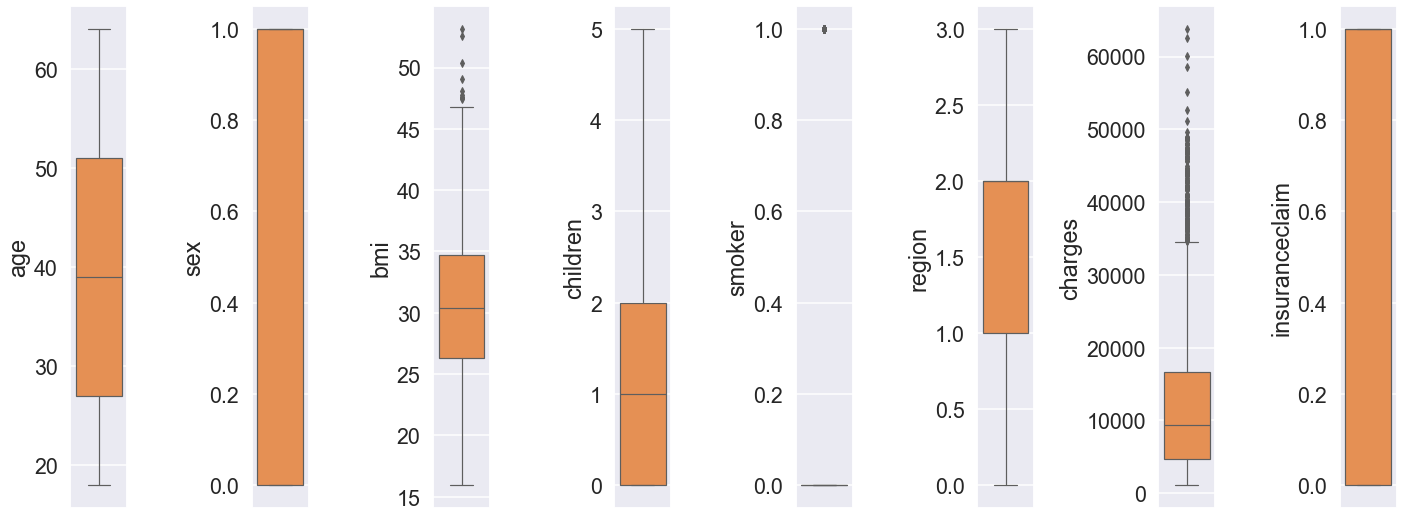

In [29]:
#boxplots to find outliers
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.3)
for i in range(0,8):
    plt.subplot(2,8,i+1)
    sns.boxplot(x=ins[insval[i]],data=ins,palette='Oranges',orient='v',linewidth=1.2)    
plt.tight_layout()

In [30]:
z=np.abs(zscore(ins))
z

array([[1.44041773, 1.00977099, 0.45315959, ..., 1.34316271, 0.2978567 ,
        0.84244802],
       [1.51164747, 0.99032355, 0.50942165, ..., 0.43801727, 0.9543806 ,
        0.84244802],
       [0.79935006, 0.99032355, 0.3831546 , ..., 0.43801727, 0.72937251,
        1.18701685],
       ...,
       [1.51164747, 1.00977099, 1.01448983, ..., 0.43801727, 0.96228744,
        0.84244802],
       [1.29795825, 1.00977099, 0.79752426, ..., 1.34316271, 0.9310536 ,
        1.18701685],
       [1.55123139, 1.00977099, 0.26129928, ..., 0.46712816, 1.31029752,
        0.84244802]])

In [31]:
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [32]:
z[32][3]
#checking the values of z 

3.2397285521666808

In [33]:
insu=ins[(z<3).all(axis=1)]
insu

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [34]:
print('earlier the shape of ins with outliers was:', ins.shape, '\n the shape of ins after outlier removal is: ',insu.shape)

earlier the shape of ins with outliers was: (1337, 8) 
 the shape of ins after outlier removal is:  (1308, 8)


after outlier removal treatment 29 rows have been removed


In [35]:
insval=insu.columns.values


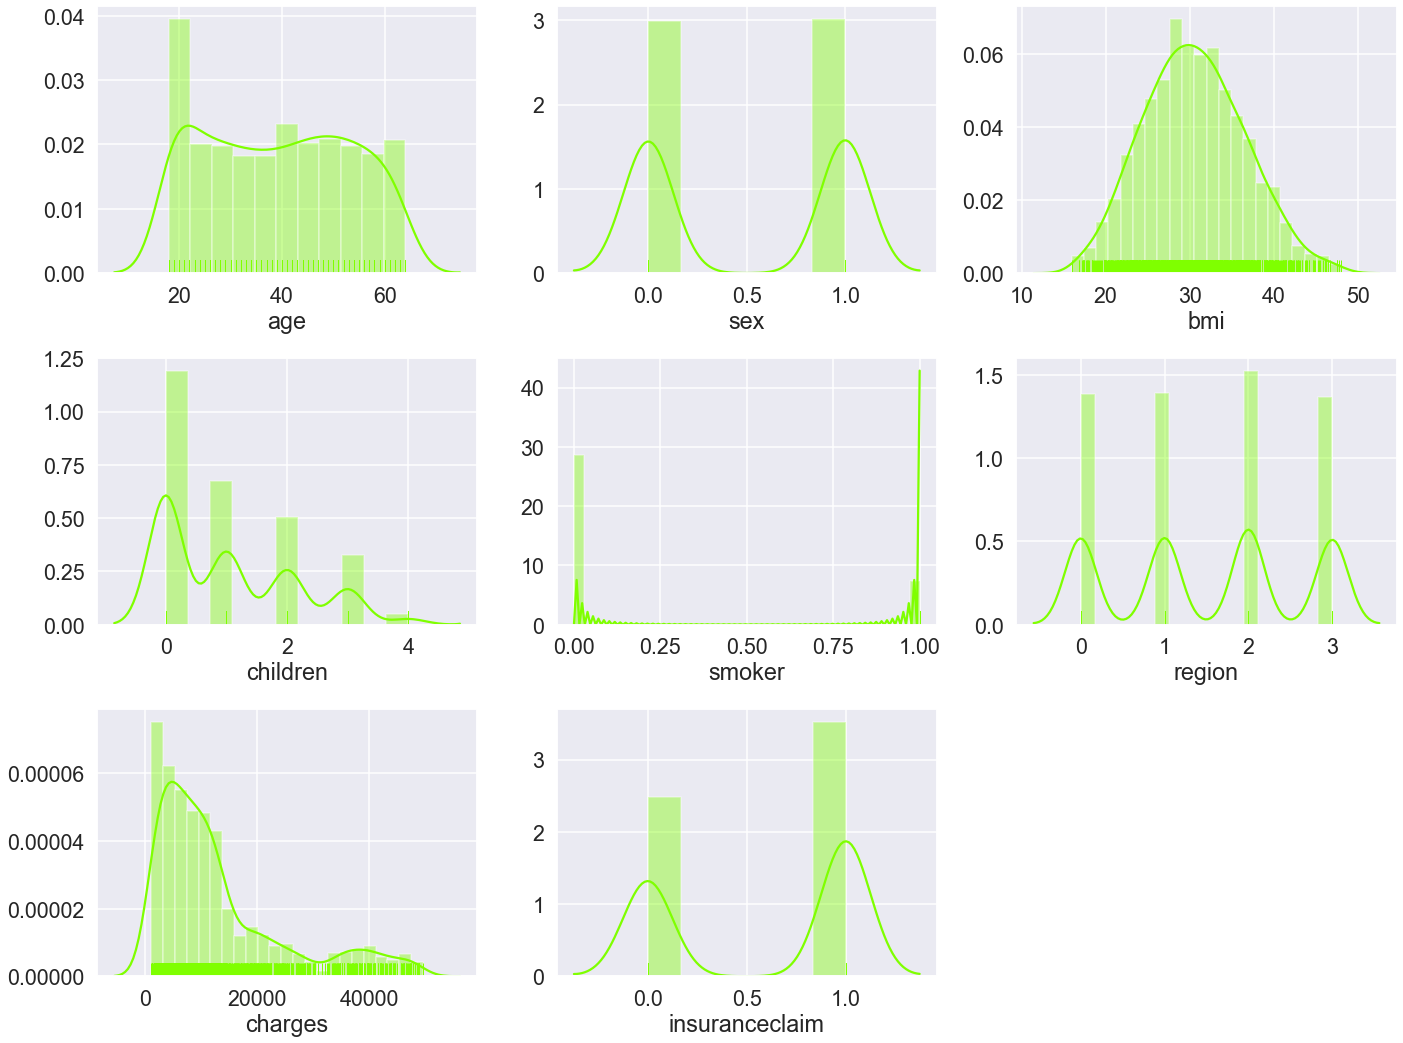

In [36]:
#distplot: to see the distribution of attributes of the datasets
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.3)
for i in range(0,8):
    plt.subplot(3,3,i+1)
    sns.distplot(insu[insval[i]],color='chartreuse',hist=True,rug=True,kde=True)    
plt.tight_layout()

In [37]:
#checking and removing skewness
insu.skew()

age               0.050421
sex              -0.009185
bmi               0.191361
children          0.737050
smoker            1.481539
region           -0.024001
charges           1.436653
insuranceclaim   -0.351245
dtype: float64

In [38]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and that must be removed.
for i in insu.columns:
    if insu.skew().loc[i]>0.55:
        insu[i]=np.log1p(insu[i])
print(insu.skew())  

age               0.050421
sex              -0.009185
bmi               0.191361
children          0.224207
smoker            1.481539
region           -0.024001
charges          -0.106876
insuranceclaim   -0.351245
dtype: float64


In [39]:
insu
#dataset after removing the skew

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0.000000,0.693147,3,9.734236,1
1,18,1,33.770,0.693147,0.000000,2,7.453882,1
2,28,1,33.000,1.386294,0.000000,2,8.400763,0
3,33,1,22.705,0.000000,0.000000,1,9.998137,0
4,32,1,28.880,0.000000,0.000000,1,8.260455,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0.000000,1,9.268755,0
1334,18,0,31.920,0.000000,0.000000,0,7.699381,1
1335,18,0,36.850,0.000000,0.000000,2,7.396847,1
1336,21,0,25.800,0.000000,0.000000,3,7.605365,0


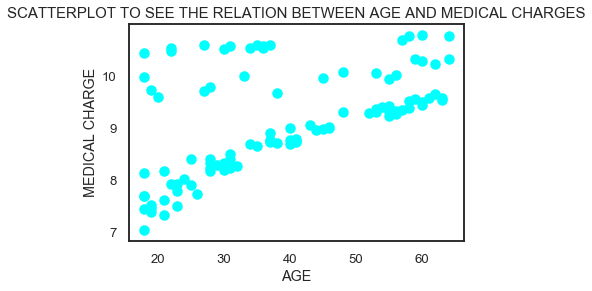

In [40]:
#scatterplot
sns.set(style='white')
sns.set_context('talk',font_scale=0.8)
plt.scatter(insu['age'].head(100),insu['charges'].head(100),c='aqua')
plt.xlabel("AGE")
plt.ylabel('MEDICAL CHARGE')
plt.title('SCATTERPLOT TO SEE THE RELATION BETWEEN AGE AND MEDICAL CHARGES', SIZE=15)
plt.show()

In [41]:
#plotting a correlation table so the relation of attributes
insu_corr=insu.corr()
insu_corr

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.018180,0.118272,0.058937,-0.029671,0.002619,0.530418,0.110427
sex,-0.018180,1.000000,0.042514,0.014832,0.079479,0.003434,0.008574,0.027139
bmi,0.118272,0.042514,1.000000,0.029019,-0.005289,0.160139,0.133848,0.383692
children,0.058937,0.014832,0.029019,1.000000,0.027310,0.001372,0.185003,-0.420175
smoker,-0.029671,0.079479,-0.005289,0.027310,1.000000,-0.003651,0.659050,0.330637
region,0.002619,0.003434,0.160139,0.001372,-0.003651,1.000000,-0.045385,0.026426
charges,0.530418,0.008574,0.133848,0.185003,0.659050,-0.045385,1.000000,0.228882
insuranceclaim,0.110427,0.027139,0.383692,-0.420175,0.330637,0.026426,0.228882,1.000000


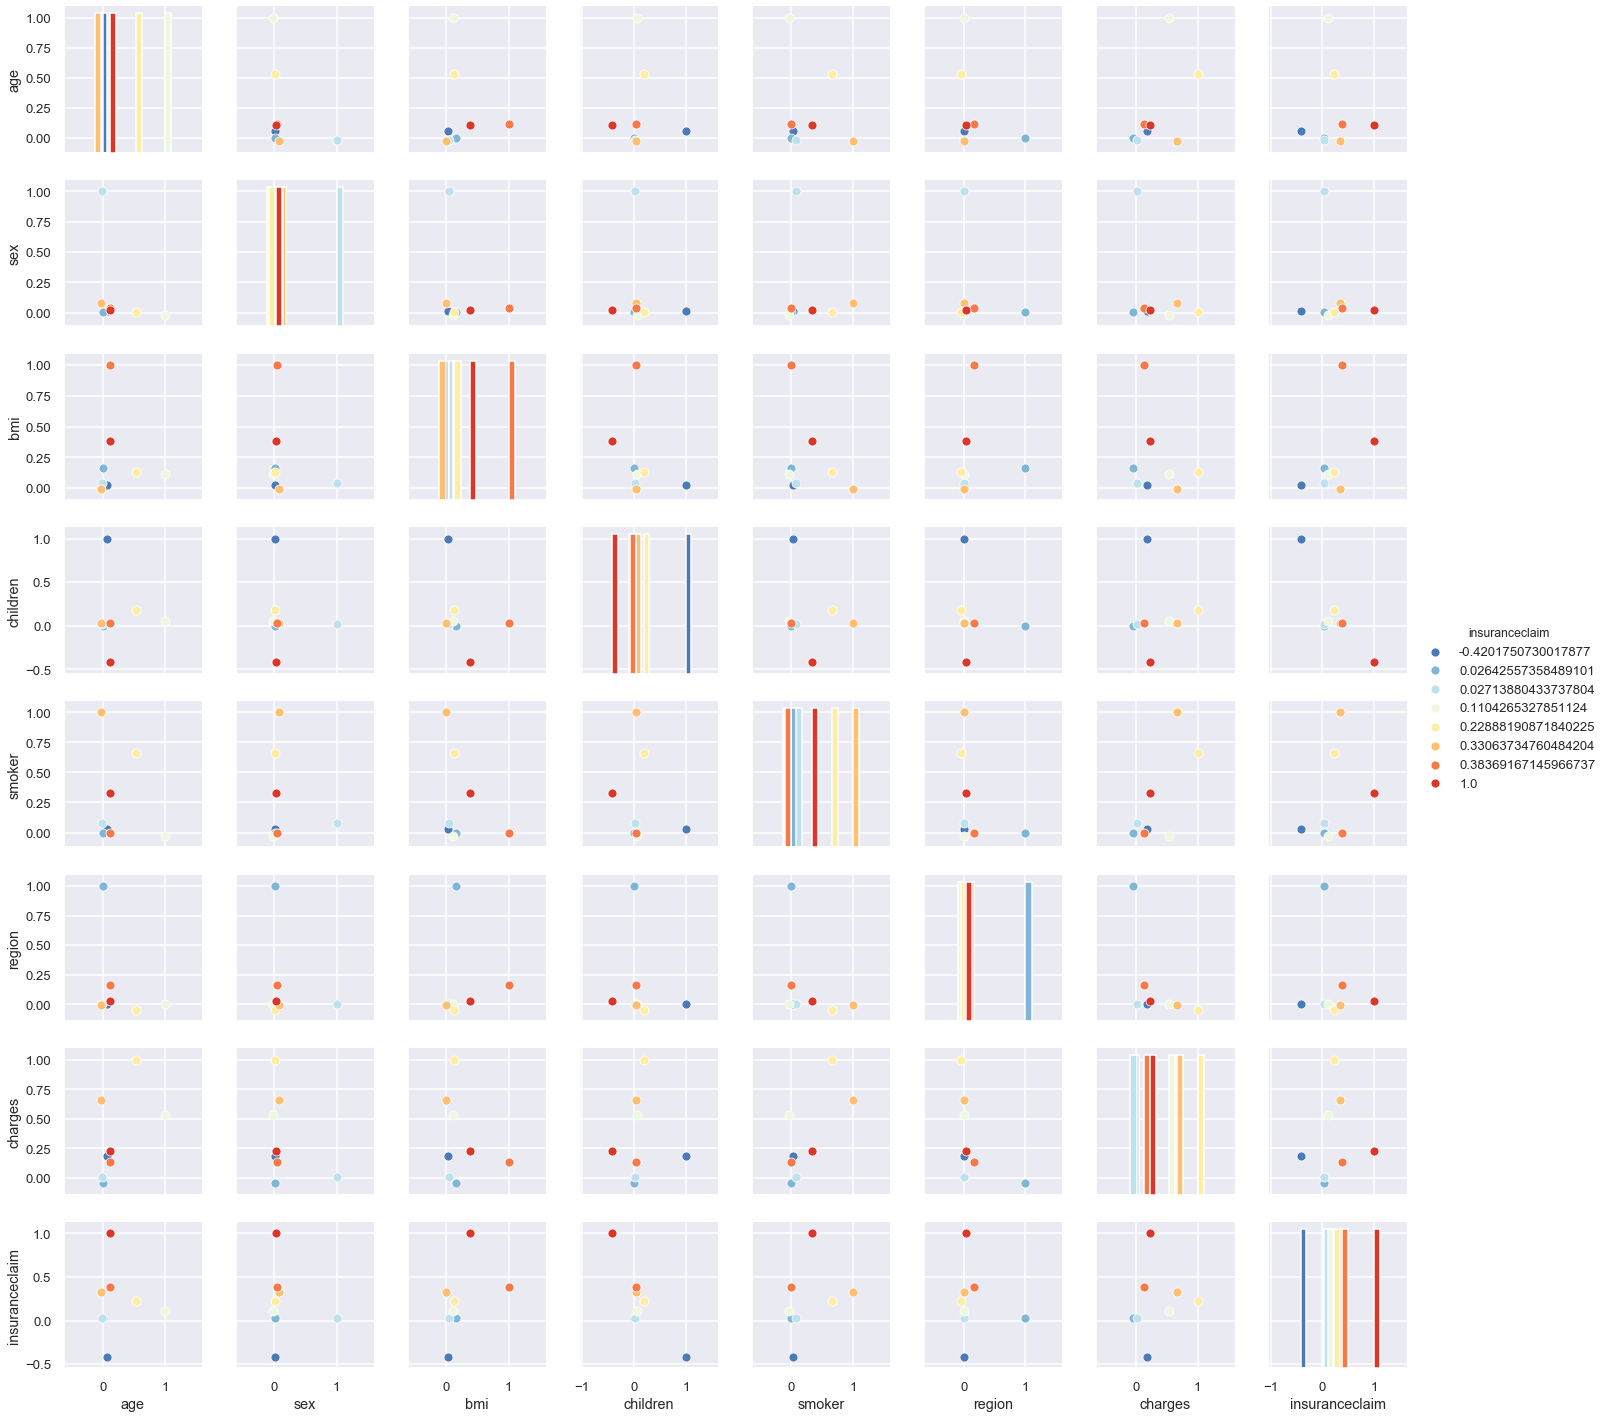

In [42]:
#pairplot to see the corelation
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.pairplot(insu_corr,hue='insuranceclaim',palette='RdYlBu_r',diag_kind='hist')
plt.show()

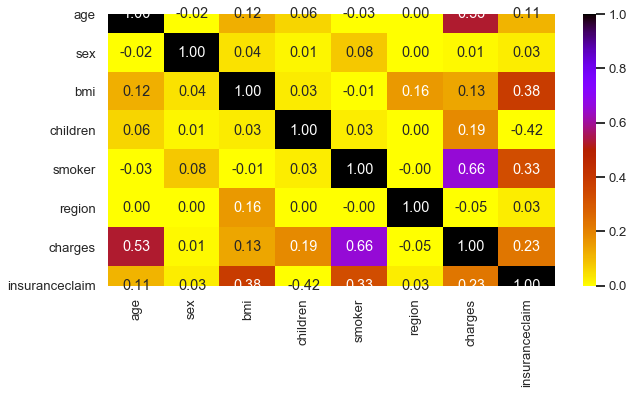

In [43]:
#heatmap to visualize the co-relations
plt.figure(figsize=(10,5))
sns.heatmap(insu_corr,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='gnuplot_r')
plt.show()

In [44]:
insu

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0.000000,0.693147,3,9.734236,1
1,18,1,33.770,0.693147,0.000000,2,7.453882,1
2,28,1,33.000,1.386294,0.000000,2,8.400763,0
3,33,1,22.705,0.000000,0.000000,1,9.998137,0
4,32,1,28.880,0.000000,0.000000,1,8.260455,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0.000000,1,9.268755,0
1334,18,0,31.920,0.000000,0.000000,0,7.699381,1
1335,18,0,36.850,0.000000,0.000000,2,7.396847,1
1336,21,0,25.800,0.000000,0.000000,3,7.605365,0


In [45]:
x=insu.iloc[:,0:7]
y=insu.iloc[:,-1]

In [46]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0.000000,1,9.268755
1334,18,0,31.920,0.000000,0.000000,0,7.699381
1335,18,0,36.850,0.000000,0.000000,2,7.396847
1336,21,0,25.800,0.000000,0.000000,3,7.605365


In [47]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1308, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc
import joblib
import warnings
warnings.filterwarnings('ignore')

In [49]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x,'\n\n shape of x=', x.shape)

[[-1.44075415 -1.00459773 -0.44918647 ...  1.98389744  1.35199437
   0.70235052]
 [-1.51180593  0.99542332  0.5331877  ... -0.50405831  0.4469746
  -1.79397356]
 [-0.80128811  0.99542332  0.40432431 ... -0.50405831  0.4469746
  -0.7574139 ]
 ...
 [-1.51180593 -1.00459773  1.04864127 ... -0.50405831  0.4469746
  -1.85641061]
 [-1.29865058 -1.00459773 -0.80063208 ... -0.50405831  1.35199437
  -1.62814354]
 [ 1.54342071 -1.00459773 -0.25338105 ...  1.98389744 -0.45804517
   1.29974687]] 

 shape of x= (1308, 7)


In [50]:
y=np.array(y)
print(y.shape)

(1308,)


In [51]:
y=y.reshape(-1,1)
print(y.shape)

(1308, 1)


In [52]:
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\nThe best suited random_score is: ', final_rst, '\nWith an accuracy score of: ', max_ac_score)
    print('f1_score:', f1)
    print('Confusion matrix:\n')
    print(conf)
    return final_rst

In [53]:
lreg=LogisticRegression()
lregm=acusr(lreg,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 
The best suited random_score is:  44 
With an accuracy score of:  0.9039301310043668
f1_score: 0.888045540796964
Confusion matrix:

[[165  33]
 [ 26 234]]


In [54]:
#cross_val_score to check for over/under fitting of logistic regressor model
logi_scr=cross_val_score(lreg,x,y,scoring='accuracy',cv=30)

In [55]:
print('The mean accuracy score produced by the Logistic Regressor Model is= ', logi_scr.mean())

The mean accuracy score produced by the Logistic Regressor Model is=  0.8700775193798452


In [56]:
#using DecisionTreeClassifier algo with grid_search_cv to get best parameters for optimum performance
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10)}
dtc_gs=GridSearchCV(dtc,dtc_para,cv=30)
dtc_gs.fit(x,y)
print(dtc_gs)
print(dtc_gs.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                        

In [57]:
#using the parameters obtained from GridSearchCV to create a optimum result producing model

dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,splitter='best')
dtcm=acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 
The best suited random_score is:  108 
With an accuracy score of:  0.9956331877729258
f1_score: 0.9489603024574669
Confusion matrix:

[[180  18]
 [  9 251]]


In [58]:
#cross_val_score to check for over/under fitting of dtc model
dtc_scr=cross_val_score(dtc,x,y,scoring='accuracy',cv=30)

In [59]:
print('The mean accuracy score produced by DTC model is = ', dtc_scr.mean())

The mean accuracy score produced by DTC model is =  0.9862050739957716


In [60]:
#using KNeighborsClassifier algo with grid_search_cv to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[10,30,35]}
knc_grd=GridSearchCV(knc,knc_para,cv=30)
knc_grd.fit(x,y)
print(knc_grd)
print(knc_grd.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 35],
                         'n_neighbors': range(20, 65)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 22}


In [61]:
#using the parameters obtained from GridSearchCV to create a optimum result producing model
knc=KNeighborsClassifier(algorithm='ball_tree',leaf_size=10, n_neighbors=22)
kncm=acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform') 
The best suited random_score is:  110 
With an accuracy score of:  0.8820960698689956
f1_score: 0.8493150684931506
Confusion matrix:

[[164  34]
 [ 43 217]]


In [62]:
#checking for under/over fitting of the knc  model
knc_scr=cross_val_score(knc,x,y,scoring='accuracy',cv=30)

In [63]:
print('The mean accuracy score produced by the KNC model is: ',knc_scr.mean() )

The mean accuracy score produced by the KNC model is:  0.8631735964294105


In [64]:
#using SupportVectorClassifier algo with grid_search_cv to get best parameters for optimum performance
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1],'degree':[3,5,7,9],'C':[3,5,6]}
svc_grid=GridSearchCV(svc,svc_para,cv=30)
svc_grid.fit(x,y)
print(svc_grid)
print(svc_grid.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3, 5, 6], 'degree': [3, 5, 7, 9],
                         'gamma': [0.01, 0.1],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [65]:
#using the parameters obtained from GridSearchCV to create a optimum result producing model

svc=SVC(kernel='rbf',gamma=0.1,degree=3,C=3)
svcm=acusr(svc,x,y)

In this SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
The best suited random_score is:  77 
With an accuracy score of:  0.925764192139738
f1_score: 0.8951612903225806
Confusion matrix:

[[184  14]
 [ 38 222]]


In [66]:
#checking for under/over fitting of the svc model
svc_scr=cross_val_score(svc,x,y,scoring='accuracy',cv=30)

In [67]:
print('The accuracy score produced by the SVC model is: ',svc_scr.mean() )

The accuracy score produced by the SVC model is:  0.9097740975647954


In [68]:
#using GaussianNB algo to built the model
gnb=GaussianNB()
gnbm=acusr(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 
The best suited random_score is:  177 
With an accuracy score of:  0.8318777292576419
f1_score: 0.8
Confusion matrix:

[[179  19]
 [ 74 186]]


In [69]:
#checking for under/over fitting of the gnb model
gnb_scr=cross_val_score(gnb,x,y,scoring='accuracy',cv=30)

In [70]:
print('The accuracy score produced by the GNB model is: ',gnb_scr.mean() )

The accuracy score produced by the GNB model is:  0.7952513507164671


In [71]:
#so we got the following accuracy scores,f1 score from the above algorithms
info=[['LREG',0.90,0.88],['DTC',0.99,0.94],['KNC',0.88,0.84,],['SVC',0.92,0.89],['GNB',0.83,0.80]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','ACCURACY_SCORE','F1_SCORE'])
perf


,MODEL_NAME,ACCURACY_SCORE,F1_SCORE
0,LREG,0.90,0.88
1,DTC,0.99,0.94
2,KNC,0.88,0.84
3,SVC,0.92,0.89
4,GNB,0.83,0.80


In [72]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,splitter='best')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=108)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
ascr=accuracy_score(pred,y_test)
f1=f1_score(pred,y_test)
clr=classification_report(y_test,pred)
conf=confusion_matrix(y_test,pred)
print("pred=:\n", pred ,'\n')
print('The accuracy score is:', ascr)
print('Confusion matrix:\n', conf)
print('the classification report:\n', clr)
    

pred=:
 [0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1] 

The accuracy score is: 0.9956331877729258
Confusion matrix:


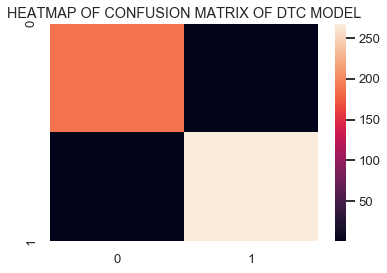

In [73]:
#using heatmap to visualize the confusion matrix for batter understanding
sns.heatmap(conf,annot=False)
plt.title('HEATMAP OF CONFUSION MATRIX OF DTC MODEL')
plt.show()

In [74]:
tpr,fpr,threshold=roc_curve(y_test,pred)

In [75]:
tpr.mean()

0.3350877192982456

In [76]:
fpr.mean()

0.6654228855721392

In [77]:
threshold

array([2, 1, 0], dtype=int64)

In [78]:
scores=roc_auc_score(y_test,pred)
scores

0.9955027494108405

In [79]:
roc_auc=auc(tpr,fpr)
roc_auc

0.9955027494108405

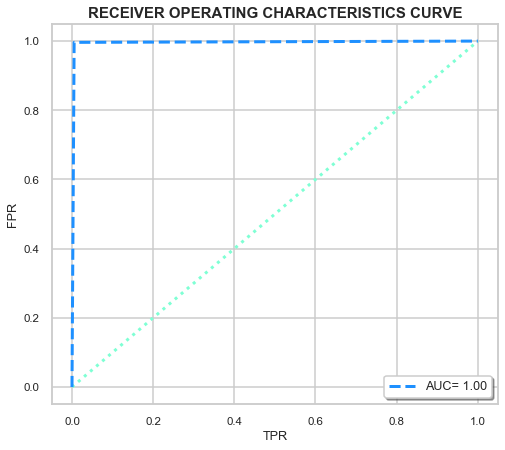

In [80]:
#plotting the auc_roc curve
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
plt.figure(figsize=(8,7))
plt.plot([0,1],[0,1],color='aquamarine',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % roc_auc,color='dodgerblue',lw=3,linestyle='--')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
plt.show()

In [81]:
#saving dtc as final model 

In [82]:
joblib.dump(dtc,"INSURANCE_DTC.pkl")

['INSURANCE_DTC.pkl']